#  <span style='color:Blue'> Project 2: Singapore Housing Price Prediction

## Contents:
- [Background](#Background)
- [Problem Statement](#Problem-Statement)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Cleaning](#Data-Cleaning)
- [Data Dictionary](#Data-Dictionary)
- [Features transformation](#Features-transformation)
- [Modeling](#Modeling)
- [Cross validation](#Cross-validation)
- [Model Fitting and Evaluation](#Model-Fitting-and-Evaluation)
- [Kaggle submission](#Kaggle-submission)
- [Conclusion](#Conclusion)

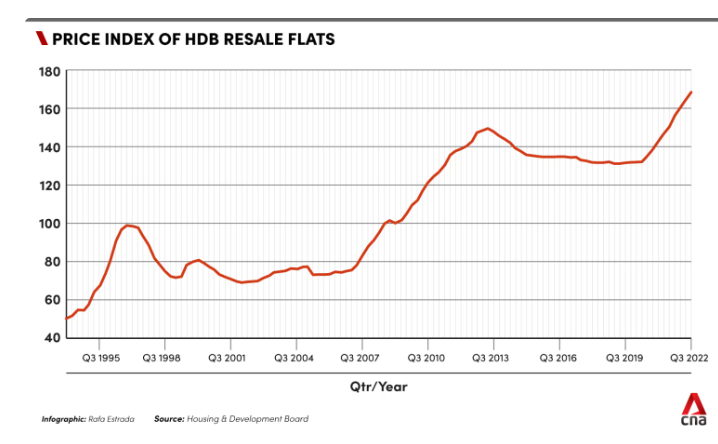

 ## <span style='color:Blue'><span class="anchor" id="Background">Background
 ---

<span style='color:Blue'> Singapore's housing market is dominated by the Housing and Development Board (HDB) flats, which serve as the primary dwelling for a significant portion of the population. In fact, HDB flats are home to around 78.7% of Singapore's residents, making them a crucial component of the country's housing landscape. As the supply of HDB flats for the resale market is set to decline sharply in the coming years, industry experts predict that this will lead to an increase in demand and, subsequently, prices. This trend is expected to continue as the difficulty in obtaining a new Build-to-Order (BTO) HDB flat through balloting further intensifies. As such, it is imperative for buyers, sellers, and agents alike to carefully consider the impact of these market dynamics on their decision-making processes.

 ## <span style='color:Blue'><span class="anchor" id="Problem Statement">Problem Statement
 ---

<span style='color:Blue'> The problem we aim to solve is the development of an accurate model that predicts future HDB resale prices using historical data. This model is intended to provide valuable insights to buyers and sellers, enabling them to make informed decisions regarding the sale or purchase of HDB resale flats. Our study will also investigate the features that are positively correlated with higher HDB prices, providing further insights into the factors that drive HDB resale prices. By addressing these challenges, we hope to contribute to a more transparent and efficient HDB resale market.Our goal is to develop a model that utilizes past HDB resale price data to accurately predict future prices for HDB resale flats. By doing so, we aim to provide buyers and sellers with valuable insights that can help them make informed decisions. Additionally, we will explore the features that have a positive correlation with higher HDB prices.

## <span style='color:Blue'><span class="anchor" id="Exploratory Data Analysis">Exploratory Data Analysis 

In [1]:
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNetCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from scipy import stats
import copy
import math

warnings.simplefilter(action = "ignore", category = FutureWarning)

pd.set_option("display.max_columns", None)

In [83]:
df_train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

C:\Users\clair\AppData\Local\Temp\ipykernel_28808\4003615059.py:1: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('../datasets/train.csv')
C:\Users\clair\AppData\Local\Temp\ipykernel_28808\4003615059.py:2: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('../datasets/test.csv')


In [3]:
#Backup the train and test data
df_train_copy = copy.copy(df_train)
df_test_copy = copy.deepcopy(test)

In [4]:
ids = df_test_copy['id']

In [5]:
df_train.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.760,15,25,2005,Y,N,N,N,N,142,0,0,0,96,46,0,0,0,0,0,0,0,382003,1.314299,103.872828,Kallang,1094.090418,NaN,NaN,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,34,9,1987,Y,N,N,N,N,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,NaN,1.0,3.0,640.151925,NaN,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,14,13,15,14,EXECUTIVE Apartment,"289B, BT BATOK ST 25",1550.016,24,16,1996,Y,N,N,N,N,90,0,0,0,0,30,60,0,0,0,0,0,0,651289,1.343867,103.760535,Bukit Batok,1459.579948,NaN,NaN,4.0,1762.082341,NaN,NaN,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,2012,4,3,1,5,3,4 ROOM Model A,"232, BISHAN ST 22",1108.692,29,11,1990,Y,Y,N,N,N,75,0,0,0,68,7,0,0,0,0,0,0,0,570232,1.358245,103.845504,Bishan,950.175199,NaN,1.0,4.0,726.215262,NaN,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,2,1,3,2,4 ROOM Simplified,"876, YISHUN ST 81",893.412,34,4,1987,Y,N,N,N,N,48,0,0,0,30,18,0,0,0,0,0,0,0,760876,1.414745,103.835532,Yishun,729.771895,NaN,1.0,2.0,1540.151439,NaN,NaN,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


In [6]:
test.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,114982,2012-11,YISHUN,4 ROOM,173,YISHUN AVE 7,07 TO 09,84.0,Simplified,1987,2012,11,8,7,9,8,4 ROOM Simplified,"173, YISHUN AVE 7",904.176,34,12,1986,Y,Y,N,N,N,132,0,0,0,92,40,0,0,0,0,0,0,0,760173,1.437066,103.831121,Yishun,877.431572,NaN,2.0,4.0,687.576779,NaN,1.0,1.0,56,123,686.660434,Canberra,0,0,1.443077,103.829703,75.683952,Blk 174,1.437558,103.831591,426.467910,Ahmad Ibrahim Primary School,92,0,1.433681,103.832924,156.322353,Ahmad Ibrahim Secondary School,218,0,1.436235,103.829987
1,95653,2019-08,JURONG WEST,5 ROOM,986C,JURONG WEST ST 93,04 TO 06,112.0,Premium Apartment,2008,2019,8,5,4,6,5,5 ROOM Premium Apartment,"986C, JURONG WEST ST 93",1205.568,13,14,2002,Y,N,N,N,N,53,0,0,0,28,25,0,0,0,0,0,0,0,643986,1.336957,103.695668,Jurong West,534.037705,NaN,1.0,3.0,2122.346226,NaN,NaN,NaN,72,94,169.478175,Pioneer,0,0,1.337343,103.697143,88.993058,Blk 653B,1.336491,103.696319,439.756851,Jurong West Primary School,45,0,1.339244,103.698896,739.371688,Jurong West Secondary School,199,0,1.335256,103.702098
2,40303,2013-10,ANG MO KIO,3 ROOM,534,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,2013,10,8,7,9,8,3 ROOM New Generation,"534, ANG MO KIO AVE 10",731.952,41,12,1979,Y,N,N,N,N,218,0,0,191,22,1,1,0,0,0,0,3,0,560534,1.374058,103.854168,Ang Mo Kio,817.050453,NaN,2.0,3.0,152.287621,1.0,3.0,11.0,50,100,694.220448,Ang Mo Kio,1,0,1.369465,103.849939,86.303575,Blk 532,1.374255,103.854919,355.882207,Jing Shan Primary School,36,0,1.371893,103.851811,305.071191,Anderson Secondary School,245,0,1.374242,103.851430
3,109506,2017-10,WOODLANDS,4 ROOM,29,MARSILING DR,01 TO 03,97.0,New Generation,1979,2017,10,2,1,3,2,4 ROOM New Generation,"29, MARSILING DR",1044.108,42,14,1976,Y,N,N,N,N,104,0,0,0,104,0,0,0,0,0,0,0,0,731029,1.442748,103.772922,Woodlands,1272.737194,NaN,NaN,3.0,501.892158,NaN,1.0,2.0,52,112,1117.203587,Marsiling,0,0,1.432757,103.773982,108.459039,Blk 32,1.443650,103.773295,929.744711,Marsiling Primary School,54,0,1.434423,103.773698,433.454591,Woodlands Secondary School,188,0,1.439183,103.774499
4,100149,2016-08,BUKIT BATOK,4 ROOM,170,BT BATOK WEST AVE 8,16 TO 18,103.0,Model A,1985,2016,8,17,16,18,17,4 ROOM Model A,"170, BT BATOK WEST AVE 8",1108.692,36,25,1985,Y,N,N,N,N,144,0,0,0,48,96,0,0,0,0,0,0,0,650170,1.346556,103.740101,Bukit Batok,1070.963675,NaN,NaN,5.0,437.593564,1.0,2.0,2.0,60,87,987.976010,Chinese Garden,0,0,1.342441,103.732225,113.645431,Blk 169,1.346899,103.741064,309.926934,Princess Elizabeth Primary School,40,0,1.349195,103.741000,217.295361,Bukit Batok Secondary School,223,0,1.348351,103.740873


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 76 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         16737 non-null  int64  
 1   Tranc_YearMonth            16737 non-null  object 
 2   town                       16737 non-null  object 
 3   flat_type                  16737 non-null  object 
 4   block                      16737 non-null  object 
 5   street_name                16737 non-null  object 
 6   storey_range               16737 non-null  object 
 7   floor_area_sqm             16737 non-null  float64
 8   flat_model                 16737 non-null  object 
 9   lease_commence_date        16737 non-null  int64  
 10  Tranc_Year                 16737 non-null  int64  
 11  Tranc_Month                16737 non-null  int64  
 12  mid_storey                 16737 non-null  int64  
 13  lower                      16737 non-null  int

In [9]:
#Now drop the  'Iid' colum since it's unnecessary for  the prediction process.
df_train.drop("id", axis = 1, inplace = True)
test.drop("id", axis = 1, inplace = True)

In [10]:
df_train['resale_price'].describe()

count    1.506340e+05
mean     4.491615e+05
std      1.433076e+05
min      1.500000e+05
25%      3.470000e+05
50%      4.200000e+05
75%      5.200000e+05
max      1.258000e+06
Name: resale_price, dtype: float64

<span style='color:Blue'>Interpretation: There is no zero price in the data 

C:\Users\clair\AppData\Local\Temp\ipykernel_28808\1266441637.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['resale_price'])


Text(1.0, 1.0, 'Looking at the distribution for resale price')

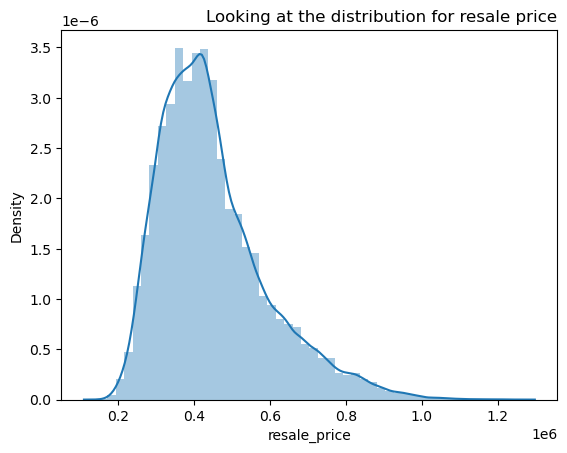

In [84]:
sns.distplot(df_train['resale_price'])
#title
title = 'Looking at the distribution for resale price'
plt.title(title, loc='right', fontsize=12)

<span style='color:Blue'>Interpretation: Have positive skewness.

In [12]:
print("Skewness: %f" % df_train['resale_price'].skew())

Skewness: 1.083759


In [13]:
df_train.corr()

,floor_area_sqm,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,Latitude,Longitude,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
floor_area_sqm,1.000000,0.283182,0.654120,0.021400,0.003735,0.023855,0.023851,0.023832,0.023855,1.000000,-0.283182,0.073098,0.288671,-0.434511,-0.063309,-0.241249,-0.585996,-0.067950,0.391143,0.512606,0.043909,-0.050890,-0.058999,-0.112918,-0.110405,0.000447,0.214800,-0.012033,-0.106064,-0.052396,-0.002157,-0.061550,0.206886,-0.165406,-0.279990,-0.299120,-0.061116,-0.206241,0.053186,0.053887,0.075549,0.208544,-0.013885,0.006461,0.214928,-0.012127,-0.113645,-0.029813,-0.042265,0.217131,-0.009764,-0.063315,-0.077721,-0.083810,0.213272,-0.009090
lease_commence_date,0.283182,1.000000,0.350337,0.204991,-0.000737,0.265112,0.266333,0.263584,0.265112,0.283182,-1.000000,0.458348,0.988912,-0.154468,-0.033546,0.047014,-0.496150,0.285400,0.332575,0.044453,-0.009338,0.140585,0.001397,-0.074427,-0.108907,0.010039,0.360358,-0.007462,-0.264398,-0.221587,-0.058893,0.012383,0.503202,-0.098590,-0.224593,-0.295798,-0.133437,-0.373966,0.154657,0.241911,0.265905,0.356519,-0.007962,-0.034772,0.360586,-0.007886,-0.181359,0.167118,-0.119898,0.366473,-0.009005,-0.070921,-0.060264,-0.091333,0.356244,-0.006985
resale_price,0.654120,0.350337,1.000000,-0.019146,-0.006823,0.353213,0.352466,0.353552,0.353213,0.654120,-0.350337,0.495650,0.353698,-0.140725,-0.039434,-0.145287,-0.410368,0.092600,0.359434,0.337500,0.037406,0.040312,-0.037993,-0.077548,-0.079965,0.013049,-0.216153,0.106596,-0.087096,0.086955,0.069929,0.115703,-0.014537,0.062637,0.134415,0.185607,-0.033581,-0.009378,-0.128222,0.002547,0.066413,-0.214939,0.106506,0.031940,-0.215760,0.106394,-0.011004,-0.016140,0.030931,-0.214707,0.106681,0.095339,0.034572,-0.000466,-0.216303,0.108911
Tranc_Year,0.021400,0.204991,-0.019146,1.000000,-0.084507,0.074611,0.085297,0.063824,0.074611,0.021400,-0.204991,0.109416,0.208061,0.005247,-0.004461,0.053855,-0.047850,0.046506,0.025932,-0.007083,0.000748,0.059314,0.000439,-0.013817,-0.017982,0.006751,0.029618,0.030170,-0.036321,-0.027456,-0.025006,0.003445,0.075139,-0.008979,-0.015340,-0.001793,-0.027702,-0.054191,0.057001,0.054520,0.069971,0.029438,0.029929,0.003643,0.029857,0.030070,0.006279,0.021354,-0.008453,0.030451,0.028764,0.014228,0.017313,0.000565,0.026951,0.029235
Tranc_Month,0.003735,-0.000737,-0.006823,-0.084507,1.000000,-0.002193,0.002920,-0.007311,-0.002193,0.003735,0.000737,-0.002670,-0.000545,0.001782,0.001055,-0.002704,0.002425,-0.002966,0.000368,0.002656,0.001062,0.001050,0.003857,0.001669,0.000797,0.000604,0.002678,0.002036,-0.002002,0.000984,0.002825,0.002062,-0.001212,0.007065,0.000775,-0.002251,0.001547,-0.000415,-0.002666,-0.000712,-0.000639,0.003066,0.002039,-0.000151,0.002664,0.002059,-0.001961,0.003409,-0.003502,0.002370,0.002070,-0.004701,-0.003391,-0.002006,0.003021,0.001979
mid_storey,0.023855,0.265112,0.353213,0.074611,-0.002193,1.000000,0.999423,0.999421,1.000000,0.023855,-0.265112,0.556540,0.268373,0.216576,-0.006942,0.027301,-0.041794,0.189617,0.215740,-0.042873,-0.006837,0.072049,-0.003592,-0.010200,-0.018180,0.004784,-0.110286,-0.035876,-0.069906,-0.002469,0.056053,0.097895,0.031928,0.087309,0.178559,0.165539,-0.033889,0.021661,0.029442,0.019507,0.074619,-0.109404,-0.032624,0.010943,-0.110066,-0.0

In [14]:
df_train.shape, test.shape

((150634, 76), (16737, 75))

C:\Users\clair\AppData\Local\Temp\ipykernel_28808\1621025227.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


Text(0.0, 1.0, 'CORRELATION MATRIX\nTop Correlated Features with more than 0.3 when comparing with resale price\n')

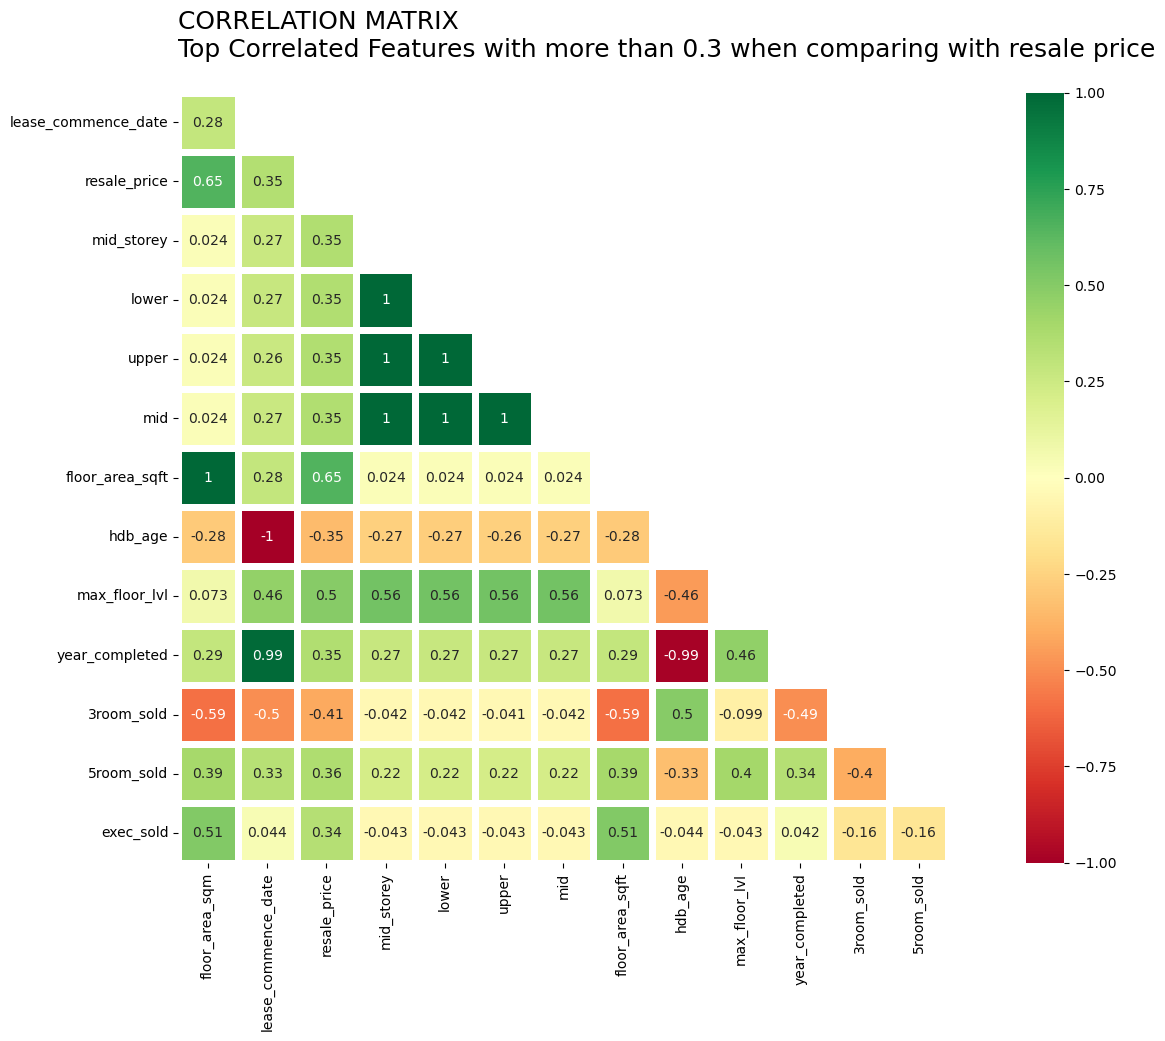

In [15]:
#corr df
corrmat = df_train.corr()
top_corr_features = corrmat.index[abs(corrmat["resale_price"])>0.3]
corr = df_train[top_corr_features].corr()

# mask
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# adjust mask and corr df
mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()

#plot heatmap and determine size and color
plt.figure(figsize=(20,10))
g = sns.heatmap(corr,annot=True,cmap="RdYlGn",mask = mask,square=True,linewidths=5,vmin=-1, vmax=1)

#title
title = 'CORRELATION MATRIX\nTop Correlated Features with more than 0.3 when comparing with resale price\n'
plt.title(title, loc='left', fontsize=18)

<span style='color:Blue'>Interpretation: 
<br><span style='color:Blue'>Floor area sqm and floor area sqft are similar so we will drop one - floor area sqm (sg context  in measurement)
<br><span style='color:Blue'>Mid storey, lower, upper and mid are similar so we will keep one only - mid
<br><span style='color:Blue'>HDB age, year completed, lease commence date are similar so we keep one - hdg age
    


Text(1.0, 1.0, 'Resale price comparing with floor area in square meter')

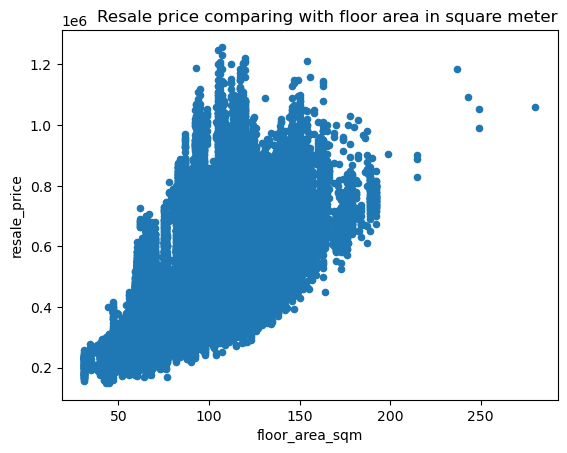

In [16]:
#scatter plot floor_area_sqm/resale_price
var = 'floor_area_sqm'
data = pd.concat([df_train['resale_price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='resale_price');

#title
title = 'Resale price comparing with floor area in square meter'
plt.title(title, loc='right', fontsize=12)

<span style='color:Blue'> Interpretation: There is sort of linear accending corr with resale price and floor area

Text(1.0, 1.0, 'Resale price comparing with maximum floor level')

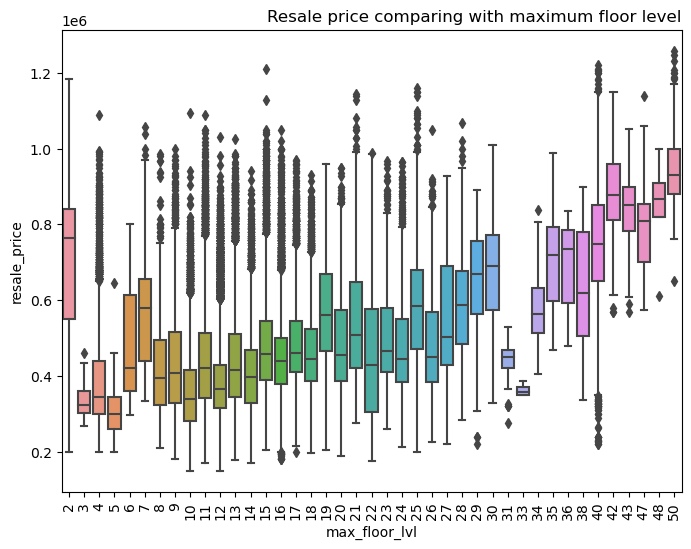

In [17]:
#box plot max_floor_lvl/resale_price
var = 'max_floor_lvl'
data = pd.concat([df_train['resale_price'], df_train[var]], axis=1)

f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="resale_price", data=data)
plt.xticks( rotation=90)
fig.axis

#title
title = 'Resale price comparing with maximum floor level'
plt.title(title, loc='right', fontsize=12)

<span style='color:Blue'> Interpretation:Generally with higher max floor the price will be better with exception of max level 2,3,4,5,31,33

Text(1.0, 1.0, 'Resale price comparing with estiamted floor level sold')

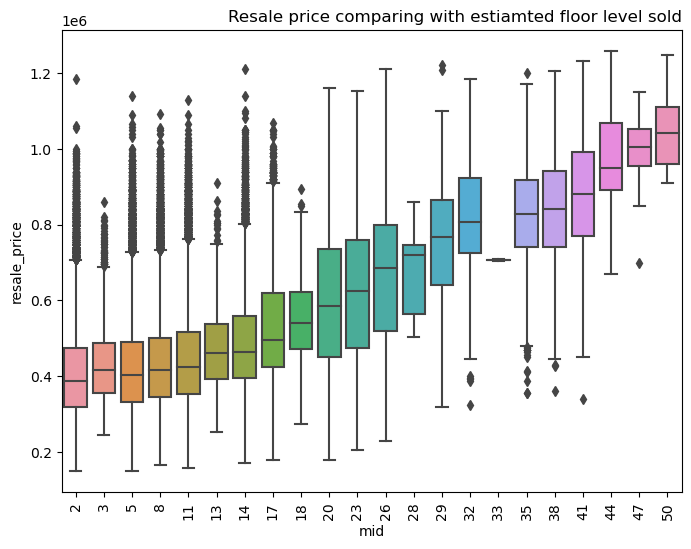

In [18]:
#box plot mid/resale_price
var = 'mid'
data = pd.concat([df_train['resale_price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="resale_price", data=data)
plt.xticks( rotation=90)
fig.axis

#title
title = 'Resale price comparing with estiamted floor level sold'
plt.title(title, loc='right', fontsize=12)

<span style='color:Blue'> Interpretation:Generally reprice increase according to floor level, but from 18 floor and below there are many outliers 

Text(1.0, 1.0, 'Resale price comparing with age of the HDB sold')

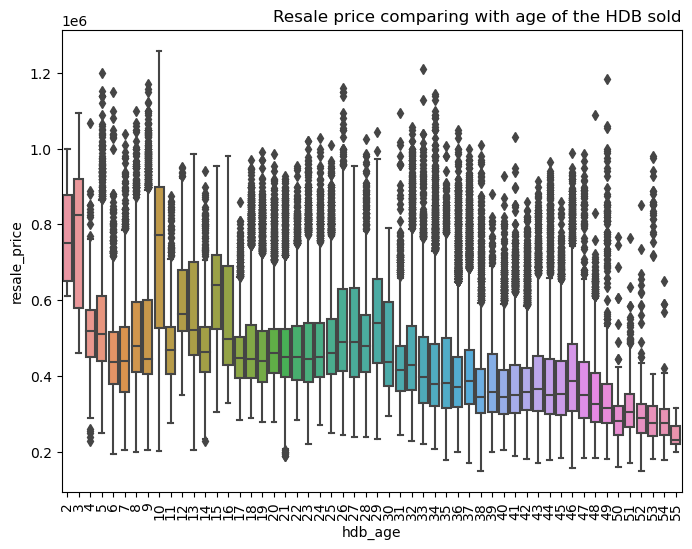

In [19]:
#box plot hdb_age/resale_price
var = 'hdb_age'
data = pd.concat([df_train['resale_price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="resale_price", data=data)
plt.xticks( rotation=90)
fig.axis

#title
title = 'Resale price comparing with age of the HDB sold'
plt.title(title, loc='right', fontsize=12)

<span style='color:Blue'> Interpretation:Generally reprice decrease with the age of the HDB

Text(1.0, 1.0, 'Resale price comparing with HDB flat type sold')

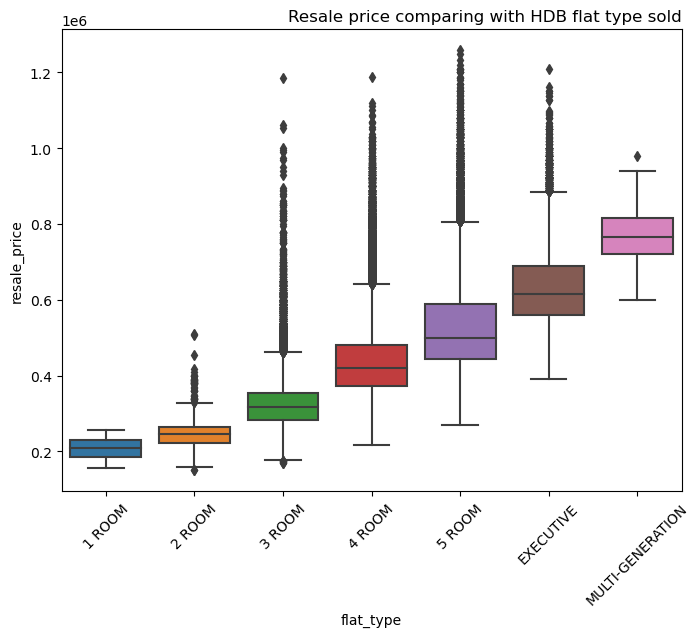

In [20]:
#box plot flat_type/resale_price
var = 'flat_type'
data = pd.concat([df_train['resale_price'], df_train[var]], axis=1)
group_means=data.groupby(['flat_type'])['resale_price'].mean().sort_values(ascending=True)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="resale_price", data=data, order=group_means.index)
plt.xticks( rotation=45)
fig.axis;

#title
title = 'Resale price comparing with HDB flat type sold'
plt.title(title, loc='right', fontsize=12)

<span style='color:Blue'> Interpretation:Generally reprice increase with larger flat type sold

Text(1.0, 1.0, 'Resale price comparing to planning area')

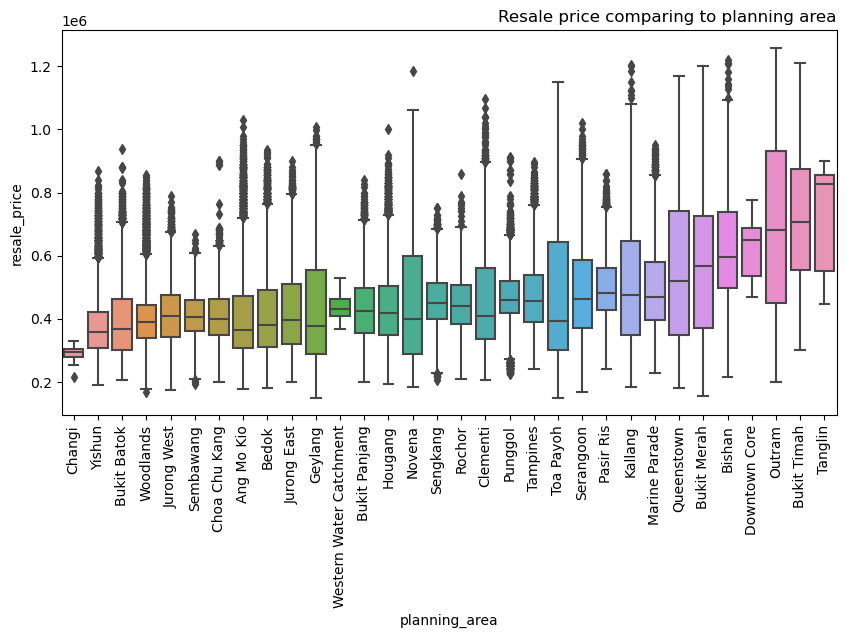

In [21]:
#box plot planning_area/resale_price
var = 'planning_area'
data = pd.concat([df_train['resale_price'], df_train[var]], axis=1)
group_means=data.groupby(['planning_area'])['resale_price'].mean().sort_values(ascending=True)
f, ax = plt.subplots(figsize=(10,5))
fig = sns.boxplot(x=var, y="resale_price", data=data, order=group_means.index)
# Rotation of the bars names
plt.xticks( rotation=90)
fig.axis;

#title
title = 'Resale price comparing to planning area'
plt.title(title, loc='right', fontsize=12)

Text(1.0, 1.0, 'Looking into 4room floor Resale price comparing to planning area')

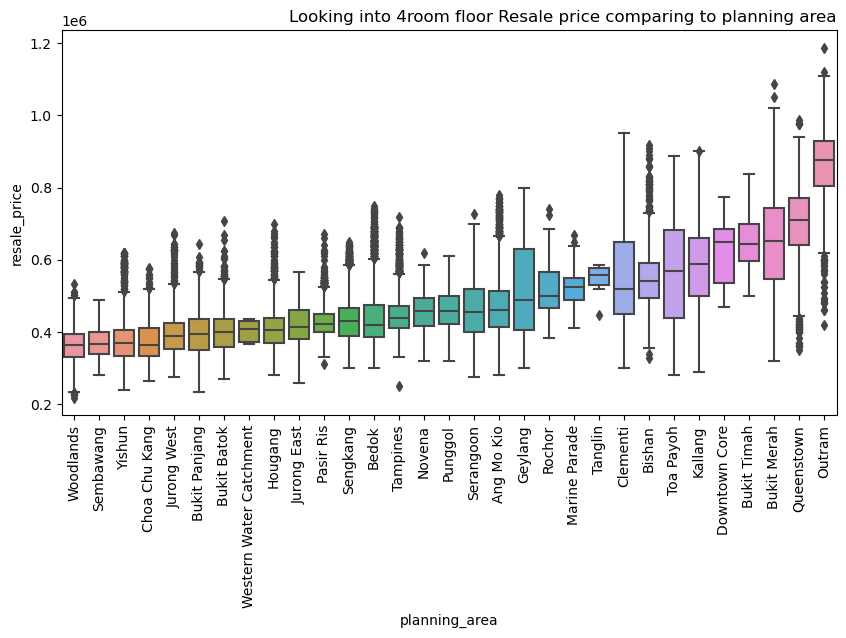

In [22]:
#do we see the same trend if we only look at 4room floor type
ds = df_train.loc[(df_train['resale_price']>0) & (df_train['flat_type'] == '4 ROOM')]
#box plot planning_area/resale_price
var = 'planning_area'
data = pd.concat([ds['resale_price'], ds[var]], axis=1)
group_means=data.groupby(['planning_area'])['resale_price'].mean().sort_values(ascending=True)
f, ax = plt.subplots(figsize=(10,5))
fig = sns.boxplot(x=var, y="resale_price", data=data, order=group_means.index)
# Rotation of the bars names
plt.xticks( rotation=90)
fig.axis;

#title
title = 'Looking into 4room floor Resale price comparing to planning area'
plt.title(title, loc='right', fontsize=12)

<span style='color:Blue'> Interpretation:Different planning area have different average price and it differs from flat type as well.

In [23]:
#check for null values
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Hawker_Within_500m,97390,0.646534
Mall_Within_500m,92789,0.615990
Hawker_Within_1km,60868,0.404079
Hawker_Within_2km,29202,0.193861
Mall_Within_1km,25426,0.168793
Mall_Within_2km,1940,0.012879
Mall_Nearest_Distance,829,0.005503
mrt_name,0,0.000000
mrt_nearest_distance,0,0.000000
hawker_market_stalls,0,0.000000


## <span style='color:Blue'><span class="anchor" id="Data Cleaning">Data Cleaning
---

In [24]:
#check for null values
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Hawker_Within_500m,10755,0.642588
Mall_Within_500m,10292,0.614925
Hawker_Within_1km,6729,0.402043
Hawker_Within_2km,3254,0.194420
Mall_Within_1km,2786,0.166458
Mall_Within_2km,213,0.012726
Mall_Nearest_Distance,84,0.005019
Tranc_YearMonth,0,0.000000
mrt_name,0,0.000000
mrt_nearest_distance,0,0.000000


In [25]:
#Fill the hawker/mall number with 0
df_train['Hawker_Within_500m'] = df_train['Hawker_Within_500m'].fillna(0)
df_train['Mall_Within_500m'] = df_train['Mall_Within_500m'].fillna(0)
df_train['Hawker_Within_1km'] = df_train['Hawker_Within_1km'].fillna(0)
df_train['Hawker_Within_2km'] = df_train['Hawker_Within_2km'].fillna(0)
df_train['Mall_Within_1km'] = df_train['Mall_Within_1km'].fillna(0)
df_train['Mall_Within_2km'] = df_train['Mall_Within_2km'].fillna(0)
df_train['Mall_Nearest_Distance'] = df_train['Mall_Nearest_Distance'].fillna(0)

test['Hawker_Within_500m'] = test['Hawker_Within_500m'].fillna(0)
test['Mall_Within_500m'] = test['Mall_Within_500m'].fillna(0)
test['Hawker_Within_1km'] = test['Hawker_Within_1km'].fillna(0)
test['Hawker_Within_2km'] = test['Hawker_Within_2km'].fillna(0)
test['Mall_Within_1km'] = test['Mall_Within_1km'].fillna(0)
test['Mall_Within_2km'] = test['Mall_Within_2km'].fillna(0)
test['Mall_Nearest_Distance'] = test['Mall_Nearest_Distance'].fillna(0)

In [26]:
#check for null values
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Tranc_YearMonth,0,0.0
Hawker_Nearest_Distance,0,0.0
mrt_name,0,0.0
mrt_nearest_distance,0,0.0
hawker_market_stalls,0,0.0
hawker_food_stalls,0,0.0
Hawker_Within_2km,0,0.0
Hawker_Within_1km,0,0.0
Hawker_Within_500m,0,0.0
Mall_Within_2km,0,0.0


In [27]:
#check for null values
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Tranc_YearMonth,0,0.0
mrt_interchange,0,0.0
mrt_name,0,0.0
mrt_nearest_distance,0,0.0
hawker_market_stalls,0,0.0
hawker_food_stalls,0,0.0
Hawker_Within_2km,0,0.0
Hawker_Within_1km,0,0.0
Hawker_Within_500m,0,0.0
Hawker_Nearest_Distance,0,0.0


In [28]:
#Selecting Features
features = [ 'town', 'flat_type','floor_area_sqm', 'flat_model',
       'Tranc_Year', 'Tranc_Month', 'mid', 'hdb_age', 'max_floor_lvl',
       'commercial', 'total_dwelling_units', '1room_sold', '2room_sold',
       '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'Mall_Within_500m', 'Mall_Within_1km',
       'Mall_Within_2km', 'Hawker_Within_500m',
       'Hawker_Within_1km', 'Hawker_Within_2km', 'hawker_food_stalls',
       'hawker_market_stalls', 'mrt_nearest_distance',
       'bus_interchange', 'mrt_interchange',
       'bus_stop_nearest_distance', 'pri_sch_nearest_distance','pri_sch_name',
       'vacancy', 'pri_sch_affiliation', 'sec_sch_nearest_dist','sec_sch_name',
       'cutoff_point', 'affiliation']

In [29]:
len(features)

43

In [30]:
train_festures = df_train[features]

In [31]:
test_features = test[features]

In [32]:
train_festures['flat_type'].value_counts()

4 ROOM              61136
3 ROOM              39060
5 ROOM              36415
EXECUTIVE           11989
2 ROOM               1896
1 ROOM                 82
MULTI-GENERATION       56
Name: flat_type, dtype: int64

## <span style='color:Blue'><span class="anchor" id="Data-Dictionary"> Data Dictionary

Below is the features that we have selected from the train data for the model to work on. 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**flat_type**|*int*|train|type of the resale flat unit, e.g. 3 ROOM| 
|**floor_area_sqm**|*float*|train|floor area of the resale flat unit in square metres| 
|**flat_model**|*object*|train|HDB model of the resale flat, e.g. Multi Generation| 
|**Tranc_Year**|*int*|train|year of resale transaction| 
|**Tranc_Month**|*int*|train|month of resale transaction| 
|**mid**|*int*|train|middle value of storey_range| 
|**hdb_age**|*int*|train|number of years from lease_commence_date to present year| 
|**max_floor_lvl**|*int*|train|highest floor of the resale flat| 
|**commercial**|*int*|train|boolean value if resale flat has commercial units in the same block| 
|**total_dwelling_units**|*int*|train|total number of residential dwelling units in the resale flat| 
|**1room_sold**|*int*|train|number of 1-room residential units in the resale flat| 
|**2room_sold**|*int*|train|number of 2-room residential units in the resale flat| 
|**3room_sold**|*int*|train|number of 3-room residential units in the resale flat| 
|**4room_sold**|*int*|train|number of 4-room residential units in the resale flat| 
|**5room_sold**|*int*|train|number of 5-room residential units in the resale flat| 
|**exec_sold**|*int*|train|number of executive type residential units in the resale flat block| 
|**multigen_sold**|*int*|train|number of multi-generational type residential units in the resale flat block| 
|**studio_apartment_sold**|*int*|train| number of studio apartment type residential units in the resale flat block| 
|**1room_rental**|*int*|train|number of 1-room rental residential units in the resale flat block| 
|**2room_rental**|*int*|train|number of 2-room rental residential units in the resale flat block| 
|**3room_rental**|*int*|train|number of 3-room rental residential units in the resale flat block| 
|**other_room_rental**|*int*|train|number of "other" type rental residential units in the resale flat block| 
|**Mall_Within_500m**|*float*|train|number of malls within 500 metres| 
|**Mall_Within_1km**|*float*|train|number of malls within 1 kilometre| 
|**Mall_Within_2km**|*float*|train|number of malls within 2 kilometres| 
|**Hawker_Within_500m**|*float*|train| number of hawker centres within 500 metres| 
|**Hawker_Within_1km**|*float*|train|number of hawker centres within 1 kilometre| 
|**Hawker_Within_2km**|*float*|train|number of hawker centres within 2 kilometres| 
|**hawker_food_stalls**|*int*|train|number of hawker food stalls in the nearest hawker centre| 
|**hawker_market_stalls**|*int*|train|number of hawker and market stalls in the nearest hawker centre| 
|**mrt_nearest_distance**|*float*|train|distance (in metres) to the nearest MRT station| 
|**bus_interchange**|*int*|train|boolean value if the nearest MRT station is also a bus interchange| 
|**mrt_interchange**|*int*|train|boolean value if the nearest MRT station is a train interchange station| 
|**bus_stop_nearest_distance**|*float*|train|distance (in metres) to the nearest bus stop| 
|**pri_sch_nearest_distance**|*float*|train|distance (in metres) to the nearest primary school| 
|**pri_sch_name**|*object*|train|name of the nearest primary school| 
|**vacancy**|*int*|train|number of vacancies in the nearest primary school| 
|**pri_sch_affiliation**|*int*|train|boolean value if the nearest primary school has a secondary school affiliation| 
|**sec_sch_nearest_dist**|*float*|train|distance (in metres) to the nearest secondary school| 
|**sec_sch_name**|*object*|train|name of the nearest secondary school| 
|**cutoff_point**|*int*|train| PSLE cutoff point of the nearest secondary school| 
|**affiliation**|*int*|train|boolean value if the nearest secondary school has an primary school affiliation| 



## <span style='color:Blue'><span class="anchor" id="Features transformation">Features transformation
---

In [33]:
train_festures = train_festures.replace({'commercial': {'N':0, 'Y':1}})
test_features = test_features.replace({'commercial': {'N':0, 'Y':1}})

In [34]:
train_festures = train_festures.replace({'flat_type': {'1 ROOM':1, '2 ROOM':2, '3 ROOM': 3, '4 ROOM': 4, '5 ROOM': 5, 'EXECUTIVE': 6, 'MULTI-GENERATION': 7}})
test_features = test_features.replace({'flat_type': {'1 ROOM':1, '2 ROOM':2, '3 ROOM': 3, '4 ROOM': 4, '5 ROOM': 5, 'EXECUTIVE': 6, 'MULTI-GENERATION': 7}})

In [35]:
# Differentiate numerical features  and categorical features (train)
categorical_features = train_festures.select_dtypes(include = ["object"]).columns
numerical_features = train_festures.select_dtypes(exclude = ["object"]).columns
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_festures_num = train_festures[numerical_features]
train_festures_cat = train_festures[categorical_features]

Numerical features : 39
Categorical features : 4


In [36]:
# Differentiate numerical features (minus the target) and categorical features (test)
categorical_features = test_features.select_dtypes(include = ["object"]).columns
numerical_features = test_features.select_dtypes(exclude = ["object"]).columns
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
test_features_num = test_features[numerical_features]
test_features_cat = test_features[categorical_features]

Numerical features : 39
Categorical features : 4


In [37]:
# Log transform of the skewed numerical features to lessen impact of outliers

# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
skewness = train_festures_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
train_festures_num[skewed_features] = np.log1p(train_festures_num[skewed_features])

31 skewed numerical features to log transform


C:\Users\clair\AppData\Local\Temp\ipykernel_28808\1358076132.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_festures_num[skewed_features] = np.log1p(train_festures_num[skewed_features])


In [38]:
# Log transform of the skewed numerical features to lessen impact of outliers

# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
skewness = test_features_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
test_features_num[skewed_features] = np.log1p(test_features_num[skewed_features])

31 skewed numerical features to log transform


C:\Users\clair\AppData\Local\Temp\ipykernel_28808\2137993849.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_features_num[skewed_features] = np.log1p(test_features_num[skewed_features])


In [39]:
# Create dummy features for categorical values via one-hot encoding (train)
print("NAs for categorical features in train : " + str(train_festures_cat.isnull().values.sum()))
train_festures_cat = pd.get_dummies(train_festures_cat, drop_first=True)
print("Remaining NAs for categorical features in train : " + str(train_festures_cat.isnull().values.sum()))

NAs for categorical features in train : 0
Remaining NAs for categorical features in train : 0


In [40]:
# Create dummy features for categorical values via one-hot encoding (test)
print("NAs for categorical features in test : " + str(test_features_cat.isnull().values.sum()))
test_features_cat = pd.get_dummies(test_features_cat, drop_first=True)
print("Remaining NAs for categorical features in yest : " + str(test_features_cat.isnull().values.sum()))

NAs for categorical features in test : 0
Remaining NAs for categorical features in yest : 0


In [41]:
# Log transform the target for official scoring
df_train.resale_price = np.log1p(df_train.resale_price)
y_train = df_train.resale_price

C:\Users\clair\AppData\Local\Temp\ipykernel_28808\2185917334.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train,fit=norm);



 mu = 12.97 and sigma = 0.30



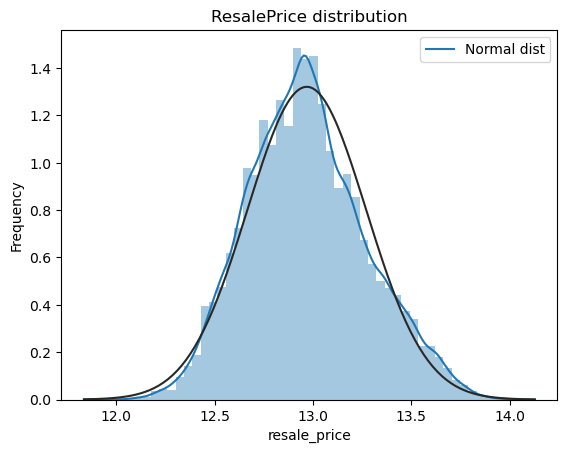

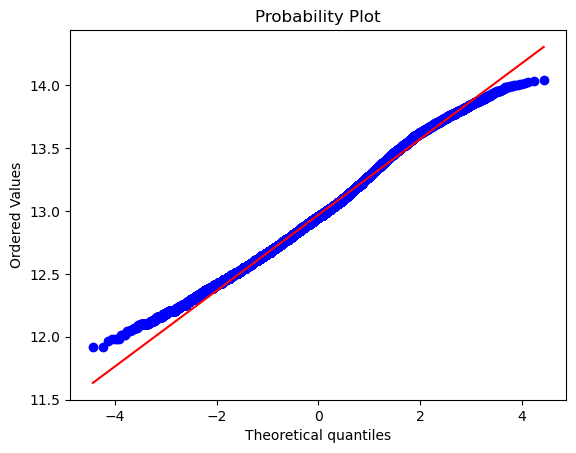

In [42]:
# Plot the distribution to check the new distribution
sns.distplot(y_train,fit=norm);
plt.legend(['Normal dist'], loc='best')
plt.ylabel('Frequency')
plt.title('ResalePrice distribution')

# Get the new normal distribution parameters
(mu, sigma) = norm.fit(y_train)
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plot QQ-plot graph
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)

In [43]:
# Join categorical and numerical features (train)
train_new = pd.concat([train_festures_num, train_festures_cat], axis = 1)
print("New number of features : " + str(train_new.shape[1]))

New number of features : 392


In [44]:
# Join categorical and numerical features (test)
test_new = pd.concat([test_features_num, test_features_cat], axis = 1)
print("New number of features : " + str(test_new.shape[1]))

New number of features : 390


In [45]:
train_new.head()

,flat_type,floor_area_sqm,Tranc_Year,Tranc_Month,mid,hdb_age,max_floor_lvl,commercial,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,affiliation,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,flat_model_Adjoined flat,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,pri_sch_name_Ahmad Ibrahim Primary School,pri_sch_name_Ai Tong School,pri_sch_name_Alexandra Primary School,pri_sch_name_Anchor Green Primary School,pri_sch_name_Anderson Primary School,pri_sch_name_Ang Mo Kio Primary School,pri_sch_name_Angsana Primary School,pri_sch_name_Beacon Primary School,pri_sch_name_Bedok Green Primary School,pri_sch_name_Bendemeer Primary School,pri_sch_name_Blangah Rise Primary School,pri_sch_name_Boon Lay Garden Primary School,pri_sch_name_Bukit Panjang Primary School,pri_sch_name_Bukit View Primary School,pri_sch_name_CHIJ,pri_sch_name_CHIJ Our Lady Queen of Peace,pri_sch_name_CHIJ Our Lady of Good Counsel,pri_sch_name_CHIJ Our Lady of The Nativity,pri_sch_name_CHIJ Primary,pri_sch_name_CHIJ Saint Nicholas Girls' School,pri_sch_name_Canberra Primary School,pri_sch_name_Canossa Catholic Primary School,pri_sch_name_Cantonment Primary School,pri_sch_name_Casuarina Primary School,pri_sch_name_Catholic High School,pri_sch_name_Cedar Primary School,pri_sch_name_Changkat Primary School,pri_sch_name_Chongfu School,pri_sch_name_Chongzheng Primary School,pri_sch_name_Chua Chu Kang Primary School,pri_sch_name_Clementi Primary School,pri_sch_name_Compassvale Primary School,pri_sch_name_Concord Primary School,pri_sch_name_Corporation Primary School,pri_sch_name_Damai Primary School,pri_sch_name_Dazhong Primary School,pri_sch_name_De La Salle School,pri_sch_name_East Spring Primary School,pri_sch_name_Edgefield Primary School,pri_sch_name_Elias Park Primary School,pri_sch_name_Endeavour Primary School,pri_sch_name_Eunos Primary School,pri_sch_name_Evergreen Primary School,pri_sch_name_Fairfield Methodist School,pri_sch_name_Farrer Park Primary School,pri_sch_name_Fengshan Primary School,pri_sch_name_Fern Green Primary School,pri_sch_name_Fernvale Primary School,pri_sch_name_First Toa Payoh Primary School,pri_sch_name_Frontier Primary School,pri_sch_name_Fuchun Primary School,pri_sch_name_Fuhua Primary School,pri_sch_name_Gan Eng Seng Primary School,pri_sch_name_Geylang Methodist School,pri_sch_name_Gongshang Primary School,pri_sch_name_Greendale Primary School,pri_sch_name_Greenridge Primary School,pri_sch_name_Greenwood Primary School,pri_sch_name_Guangyang Primary School,pri_sch_name_Haig Girls' School,pri_sch_name_Henry Park Primary School,pri_sch_name_Holy Innocents' Primary School,pri_sch_name_Hong Wen School,pri_sch_name_Horizon Primary School,pri_sch_name_Hougang Primary School,pri_sch_name_Huamin Primary School,pri_sch_name_Innova Primary School,pri_sch_name_Jiemin Primary School,pri_sch_name_Jing Shan Prim

In [46]:
train_new.shape,test_new.shape

((150634, 392), (16737, 390))

In [47]:
test_new.head()

,flat_type,floor_area_sqm,Tranc_Year,Tranc_Month,mid,hdb_age,max_floor_lvl,commercial,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,affiliation,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,pri_sch_name_Ahmad Ibrahim Primary School,pri_sch_name_Ai Tong School,pri_sch_name_Alexandra Primary School,pri_sch_name_Anchor Green Primary School,pri_sch_name_Anderson Primary School,pri_sch_name_Ang Mo Kio Primary School,pri_sch_name_Angsana Primary School,pri_sch_name_Beacon Primary School,pri_sch_name_Bedok Green Primary School,pri_sch_name_Bendemeer Primary School,pri_sch_name_Blangah Rise Primary School,pri_sch_name_Boon Lay Garden Primary School,pri_sch_name_Bukit Panjang Primary School,pri_sch_name_Bukit View Primary School,pri_sch_name_CHIJ,pri_sch_name_CHIJ Our Lady Queen of Peace,pri_sch_name_CHIJ Our Lady of Good Counsel,pri_sch_name_CHIJ Our Lady of The Nativity,pri_sch_name_CHIJ Primary,pri_sch_name_CHIJ Saint Nicholas Girls' School,pri_sch_name_Canberra Primary School,pri_sch_name_Canossa Catholic Primary School,pri_sch_name_Cantonment Primary School,pri_sch_name_Casuarina Primary School,pri_sch_name_Catholic High School,pri_sch_name_Cedar Primary School,pri_sch_name_Changkat Primary School,pri_sch_name_Chongfu School,pri_sch_name_Chongzheng Primary School,pri_sch_name_Chua Chu Kang Primary School,pri_sch_name_Clementi Primary School,pri_sch_name_Compassvale Primary School,pri_sch_name_Concord Primary School,pri_sch_name_Corporation Primary School,pri_sch_name_Damai Primary School,pri_sch_name_Dazhong Primary School,pri_sch_name_De La Salle School,pri_sch_name_East Spring Primary School,pri_sch_name_Edgefield Primary School,pri_sch_name_Elias Park Primary School,pri_sch_name_Endeavour Primary School,pri_sch_name_Eunos Primary School,pri_sch_name_Evergreen Primary School,pri_sch_name_Fairfield Methodist School,pri_sch_name_Farrer Park Primary School,pri_sch_name_Fengshan Primary School,pri_sch_name_Fern Green Primary School,pri_sch_name_Fernvale Primary School,pri_sch_name_First Toa Payoh Primary School,pri_sch_name_Frontier Primary School,pri_sch_name_Fuchun Primary School,pri_sch_name_Fuhua Primary School,pri_sch_name_Gan Eng Seng Primary School,pri_sch_name_Geylang Methodist School,pri_sch_name_Gongshang Primary School,pri_sch_name_Greendale Primary School,pri_sch_name_Greenridge Primary School,pri_sch_name_Greenwood Primary School,pri_sch_name_Guangyang Primary School,pri_sch_name_Haig Girls' School,pri_sch_name_Henry Park Primary School,pri_sch_name_Holy Innocents' Primary School,pri_sch_name_Hong Wen School,pri_sch_name_Horizon Primary School,pri_sch_name_Hougang Primary School,pri_sch_name_Huamin Primary School,pri_sch_name_Innova Primary School,pri_sch_name_Jiemin Primary School,pri_sch_name_Jing Shan Primary School,pri_sch_name_J

In [48]:
#find out the missing column in test using Apply difference function
print(train_new.columns.difference(test_new.columns))    


Index(['flat_model_Adjoined flat', 'pri_sch_name_Saint Gabriel's Primary School'], dtype='object')


In [49]:
train_new['flat_model_Adjoined flat'].value_counts()

0    150374
1       260
Name: flat_model_Adjoined flat, dtype: int64

In [50]:
train_new["pri_sch_name_Saint Gabriel's Primary School"].value_counts()

0    150629
1         5
Name: pri_sch_name_Saint Gabriel's Primary School, dtype: int64

In [51]:
#since not significant, we add in zero columns into test

In [52]:
test_new['flat_model_Adjoined flat'] = 0

In [53]:
test_new["pri_sch_name_Saint Gabriel's Primary School"] = 0

In [54]:
train_new.shape,test_new.shape

((150634, 392), (16737, 392))

In [55]:
# Join categorical and numerical features (train)
train_new_with_price = pd.concat([train_new, y_train], axis = 1)
train_new_with_price.shape

(150634, 393)

In [56]:
train_new_with_price.tail()

,flat_type,floor_area_sqm,Tranc_Year,Tranc_Month,mid,hdb_age,max_floor_lvl,commercial,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,affiliation,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,flat_model_Adjoined flat,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,pri_sch_name_Ahmad Ibrahim Primary School,pri_sch_name_Ai Tong School,pri_sch_name_Alexandra Primary School,pri_sch_name_Anchor Green Primary School,pri_sch_name_Anderson Primary School,pri_sch_name_Ang Mo Kio Primary School,pri_sch_name_Angsana Primary School,pri_sch_name_Beacon Primary School,pri_sch_name_Bedok Green Primary School,pri_sch_name_Bendemeer Primary School,pri_sch_name_Blangah Rise Primary School,pri_sch_name_Boon Lay Garden Primary School,pri_sch_name_Bukit Panjang Primary School,pri_sch_name_Bukit View Primary School,pri_sch_name_CHIJ,pri_sch_name_CHIJ Our Lady Queen of Peace,pri_sch_name_CHIJ Our Lady of Good Counsel,pri_sch_name_CHIJ Our Lady of The Nativity,pri_sch_name_CHIJ Primary,pri_sch_name_CHIJ Saint Nicholas Girls' School,pri_sch_name_Canberra Primary School,pri_sch_name_Canossa Catholic Primary School,pri_sch_name_Cantonment Primary School,pri_sch_name_Casuarina Primary School,pri_sch_name_Catholic High School,pri_sch_name_Cedar Primary School,pri_sch_name_Changkat Primary School,pri_sch_name_Chongfu School,pri_sch_name_Chongzheng Primary School,pri_sch_name_Chua Chu Kang Primary School,pri_sch_name_Clementi Primary School,pri_sch_name_Compassvale Primary School,pri_sch_name_Concord Primary School,pri_sch_name_Corporation Primary School,pri_sch_name_Damai Primary School,pri_sch_name_Dazhong Primary School,pri_sch_name_De La Salle School,pri_sch_name_East Spring Primary School,pri_sch_name_Edgefield Primary School,pri_sch_name_Elias Park Primary School,pri_sch_name_Endeavour Primary School,pri_sch_name_Eunos Primary School,pri_sch_name_Evergreen Primary School,pri_sch_name_Fairfield Methodist School,pri_sch_name_Farrer Park Primary School,pri_sch_name_Fengshan Primary School,pri_sch_name_Fern Green Primary School,pri_sch_name_Fernvale Primary School,pri_sch_name_First Toa Payoh Primary School,pri_sch_name_Frontier Primary School,pri_sch_name_Fuchun Primary School,pri_sch_name_Fuhua Primary School,pri_sch_name_Gan Eng Seng Primary School,pri_sch_name_Geylang Methodist School,pri_sch_name_Gongshang Primary School,pri_sch_name_Greendale Primary School,pri_sch_name_Greenridge Primary School,pri_sch_name_Greenwood Primary School,pri_sch_name_Guangyang Primary School,pri_sch_name_Haig Girls' School,pri_sch_name_Henry Park Primary School,pri_sch_name_Holy Innocents' Primary School,pri_sch_name_Hong Wen School,pri_sch_name_Horizon Primary School,pri_sch_name_Hougang Primary School,pri_sch_name_Huamin Primary School,pri_sch_name_Innova Primary School,pri_sch_name_Jiemin Primary School,pri_sch_name_Jing Shan Prim

## <span style='color:Blue'> <span class="anchor" id="Modeling">Modeling
---

In [57]:
# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(train_new, y_train, test_size = 0.3, random_state = 122)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (105443, 392)
X_test : (45191, 392)
y_train : (105443,)
y_test : (45191,)


In [58]:
# Calculate Baseline Mean Absolute Error
y_mean = df_train_copy['resale_price'].mean()
y_pred_baseline = [y_mean] * len(y_train)
mse_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Baseline MAE: ",mse_baseline.round(2))
rmse_baseline = round(np.sqrt(((df_train_copy['resale_price']- mse_baseline)**2).mean()),2)
print("Baseline RMSE: ",rmse_baseline)
print('Baseline R_score:',r2_score(y_train,y_pred_baseline).round(2))

Baseline MAE:  449148.53
Baseline RMSE:  143307.1
Baseline R_score: -2203895127712.3


In [59]:
# Standardize numerical features
stdSc = StandardScaler()
X_train.loc[:, numerical_features] = stdSc.fit_transform(X_train.loc[:, numerical_features])
X_test.loc[:, numerical_features] = stdSc.transform(X_test.loc[:, numerical_features])

In [60]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

### <span style='color:Blue'>Linear Regression without regularization
---

RMSE on Training set : 0.08644107424621819
RMSE on Test set : 961221.4421432449


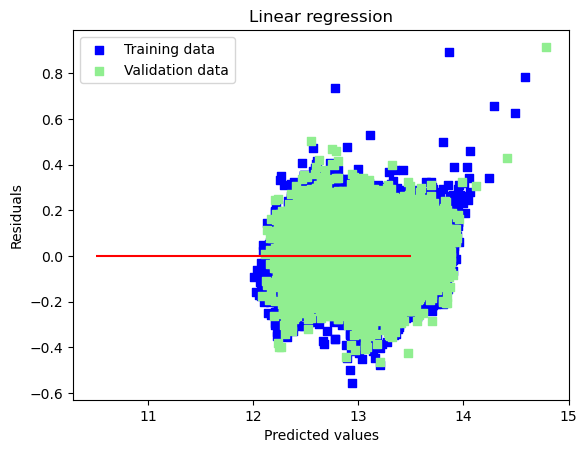

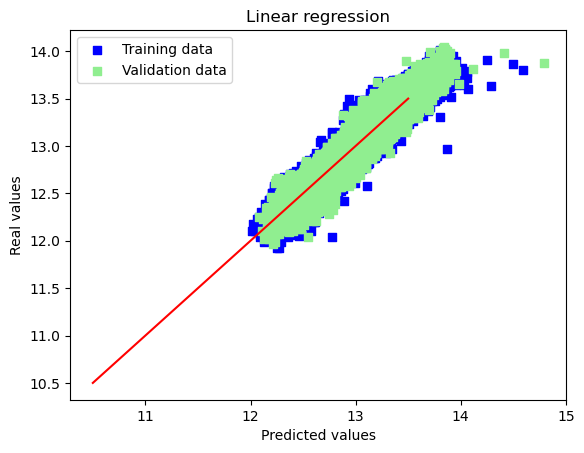

In [61]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

<span style='color:Blue'> Interpretation:It seems that the RMSE on the training set is much smaller than the RMSE on the test set. This suggests that the model may be overfitting the training data, meaning that it is too complex and has learned the noise in the training data instead of the underlying pattern. This can lead to poor performance on new, unseen data, as evidenced by the high RMSE on the test set.

### <span style='color:Blue'>Linear Regression with Ridge regularization (L2 penalty)
---

Best alpha : 0.06
Try again for more precision with alphas centered around 0.06
Best alpha : 0.051
Ridge RMSE on Training set : 0.08644019847169801
Ridge RMSE on Test set : 0.08597815796449262


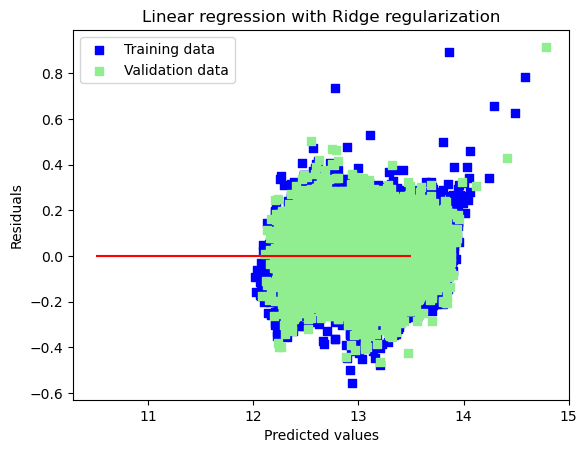

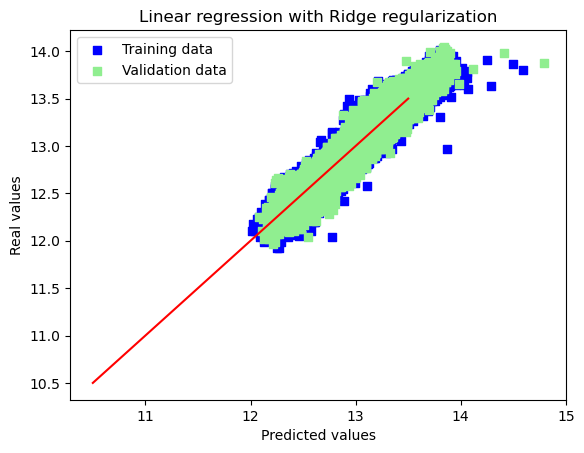

Ridge picked 392 features and eliminated the other 0 features


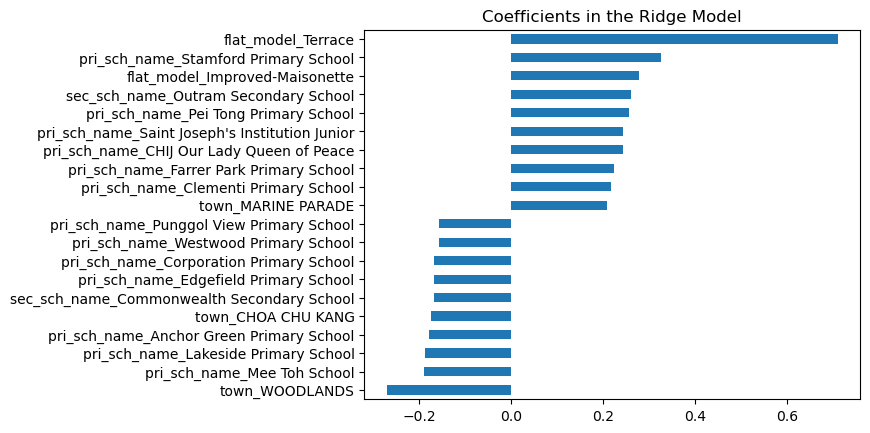

In [62]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, ], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

<span style='color:Blue'> Interpretation:  Ridge used all of the existing features.  
<span style='color:Blue'> Training with a Ridge regression model to search for the best value of the regularization parameter alpha.The model found that the best alpha is 0.051, which is slightly lower than your previous best value 0.06.  
<span style='color:Blue'> From the root mean squared error (RMSE) of your Ridge model on the training and test sets, and it seems after adding regulaztion the model is performing well with both RMSE values being relatively low, suggesting that it eliminated most of the overfitting. . However, it's worth noting to compare other models to assess how well it is doing in comparison.

### <span style='color:Blue'>Linear Regression with Lasso regularization (L1 penalty)
---

Best alpha : 0.0001
Try again for more precision with alphas centered around 0.0001
Best alpha : 6e-05
Lasso RMSE on Training set : 0.08808505377001638
Lasso RMSE on Test set : 0.0876374090909784


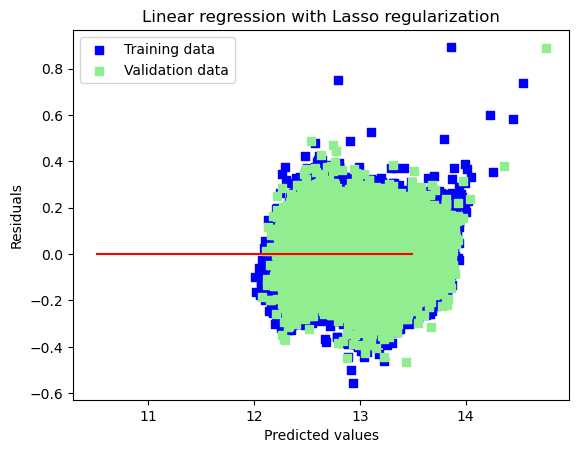

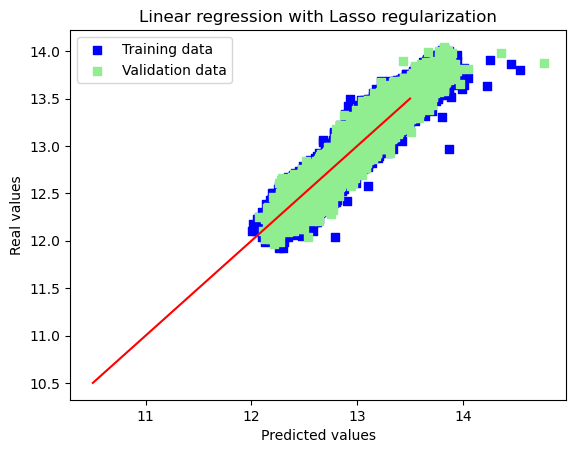

Lasso picked 231 features and eliminated the other 161 features


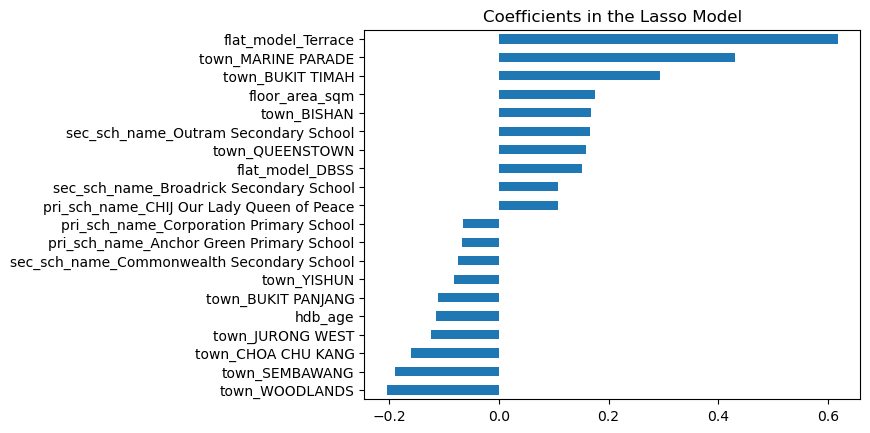

In [63]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

<span style='color:Blue'> Interpretation:   
<span style='color:Blue'>Training a Lasso regression model on a dataset and trying to find the best value of the hyperparameter alpha, which controls the strength of regularization. Based on the initial results, it seems like the best value of alpha is around 0.0001.  
<span style='color:Blue'> The best alpha is 6e-05, which is slightly lower than the initial estimate of 0.0001. The Lasso RMSE on the training set is 0.08808505377001638, which means that on average, the model is off by about 0.088 units from the true target values. The Lasso RMSE on the test set is slightly lower at 0.0876374090909784, which suggests that the model is performing well on new, unseen data.  
<span style='color:Blue'> This model uses only two third of the features. For ridge the big weights when to the schools while for lasso we see more weightage on the town. 

### <span style='color:Blue'>Linear Regression with ElasticNet regularization (L1 and L2 penalty)
---

Best l1_ratio : 0.1
Best alpha : 0.0001
Try again for more precision with l1_ratio centered around 0.1
Best l1_ratio : 0.085
Best alpha : 0.0001
Now try again for more precision on alpha, with l1_ratio fixed at 0.085 and alpha centered around 0.0001
Best l1_ratio : 0.085
Best alpha : 6e-05
ElasticNet RMSE on Training set : 0.08660257010715955
ElasticNet RMSE on Test set : 0.08611171439878537


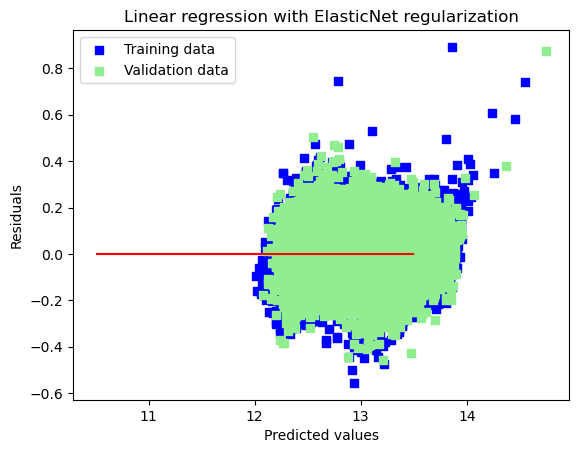

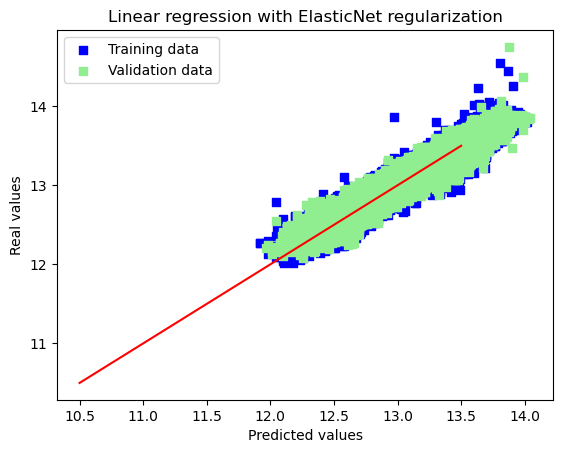

ElasticNet picked 351 features and eliminated the other 41 features


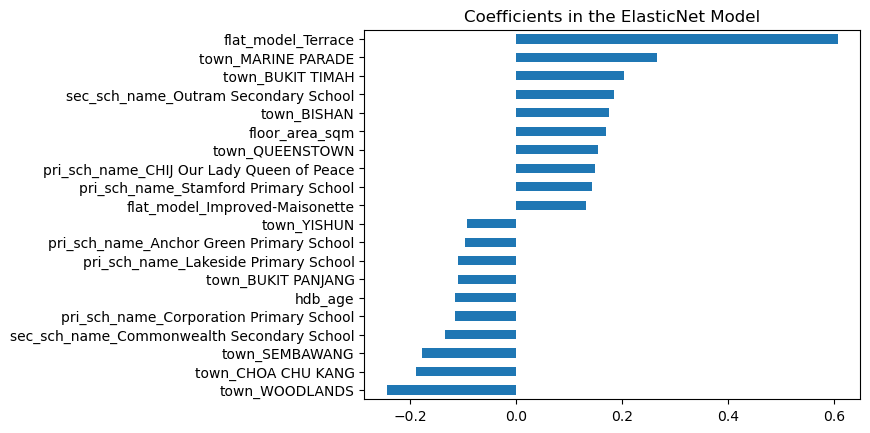

In [64]:
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("ElasticNet RMSE on Training set :", rmse_cv_train(elasticNet).mean())
print("ElasticNet RMSE on Test set :", rmse_cv_test(elasticNet).mean())
y_train_ela = elasticNet.predict(X_train)
y_test_ela = elasticNet.predict(X_test)

# Plot residuals
plt.scatter(y_train_ela, y_train_ela - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_ela, y_test_ela - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train, y_train_ela, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, y_test_ela, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

<span style='color:Blue'> Interpretation:   
<span style='color:Blue'>The search for the optimal ElasticNet model was conducted by setting l1_ratio at 0.085 and alpha at approximately 0.0001, resulting in the best alpha value of 0.00006. The trained ElasticNet model achieved an RMSE of 0.0866 on the training set and an RMSE of 0.0861 on the test set.  

<span style='color:Blue'>The coefficients of the model suggest that certain factors, such as location, have a more significant impact on resale flat prices. For instance, Woodlands and Choa Chu Kang tend to fetch lower resale prices, while Marina Parade and Bukit Timah tend to command higher resale prices.  

<span style='color:Blue'>Comparing the performance of the Ridge and ElasticNet models on the test set, both achieved similar RMSE values of 0.0859 and 0.0861, respectively. However, the Ridge model exhibited a slightly lower RMSE on the training set, indicating that it may be slightly better at fitting the training data. Nevertheless, the difference in RMSE between the two models is minimal and may not have practical significance.






## <span style='color:Blue'><span class="anchor" id="Cross validation">Cross validation
---

Use `cross_val_score` to evaluate all three models.

In [65]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=3)
lr_scores.mean()

-110489824608229.45

In [66]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=3)
lasso_scores.mean()

0.9151451790041808

In [67]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
ridge_scores.mean()

0.9181847611380533

In [68]:
elasticNet_scores = cross_val_score(elasticNet, X_train, y_train, cv=3)
elasticNet_scores.mean()

0.9179206296143138

<span style='color:Blue'> Interpretation:   
<span style='color:Blue'>The scores are rather close for lasso, ridge and elasticNet. But will prefer the elasticNet important coefficient. 

## <span style='color:Blue'><span class="anchor" id="Model Fitting and Evaluation">Model Fitting and Evaluation
---

Fit the model to the training data, and evaluate the training and test scores below.

In [69]:
elasticNet.fit(X_train, y_train)

ElasticNetCV(alphas=[6e-05, 6.500000000000001e-05, 7e-05, 7.500000000000001e-05,
                     8e-05, 8.5e-05, 9e-05, 9.5e-05, 0.0001, 0.000105,
                     0.00011000000000000002, 0.00011499999999999999, 0.000125,
                     0.00013000000000000002, 0.00013500000000000003, 0.00014],
             cv=10, l1_ratio=0.085, max_iter=50000)

In [70]:
elasticNet.score(X_train, y_train)

0.918651821471874

In [71]:
elasticNet.score(X_test, y_test)

0.9186732441861293

In [72]:
elasticNet_scores.mean()

0.9179206296143138

In [73]:
pred= (elasticNet.predict(X_test))

In [74]:
predictions_submission = np.exp(elasticNet.predict(X_test))
predictions_submission

array([392748.67768841, 339961.15300108, 653854.79362979, ...,
       449980.3129573 , 313144.15772254, 431261.62396362])

In [75]:
r2 = r2_score(y_test, pred)
print('Baseline R_score:',r2)

Baseline R_score: 0.9186732441861293


In [76]:
predictions = pd.DataFrame(zip(ids, predictions_submission), columns=['Id', 'Predicted'])


In [77]:
predictions['Id'] = predictions['Id'].astype('int')

In [78]:
#Output the predict data of validation set
predictions.to_csv('../datasets/hdb_prices_predictions.csv',index=False)

In [79]:
#RMSE of validation data
rmse_baseline = np.sqrt(mean_squared_error(y_test,pred))
print("Baseline RMSE: ",rmse_baseline)

Baseline RMSE:  0.08589613471136895


## <span style='color:Blue'><span class="anchor" id="Kaggle submission">Kaggle submission
---

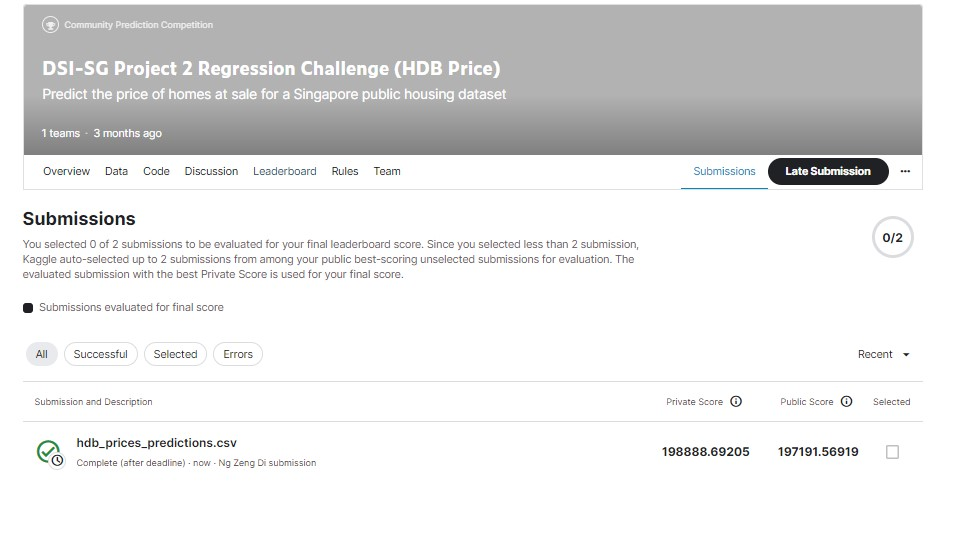
<img src="picture.jpg" alt="submiited" width ="500"/>

<span style='color:Blue'> Above is the submission for kaggle.

# <span style='color:Blue'><span class="anchor" id="Conclusion">Conclusion
---

<span style='color:Blue'>The final model's predictions were found to be off by only 0.0859 from the true values, indicating a high level of accuracy. Notably, the model identified several positive coefficients that significantly impact the resale price of HDB flats. These include flat models such as terrace and improved maisonette, which are considered larger HDB types, as well as towns closer to the city center like Marina Parade, Bukit Timah, Queenstown, and Bishan. Furthermore, schools located near the city center also have a positive correlation with higher resale prices. Lastly, the floor area of an HDB flat was also found to have a significant impact on the resale price. Buyers and sellers can use this information to make informed decisions when pricing their HDB flats.

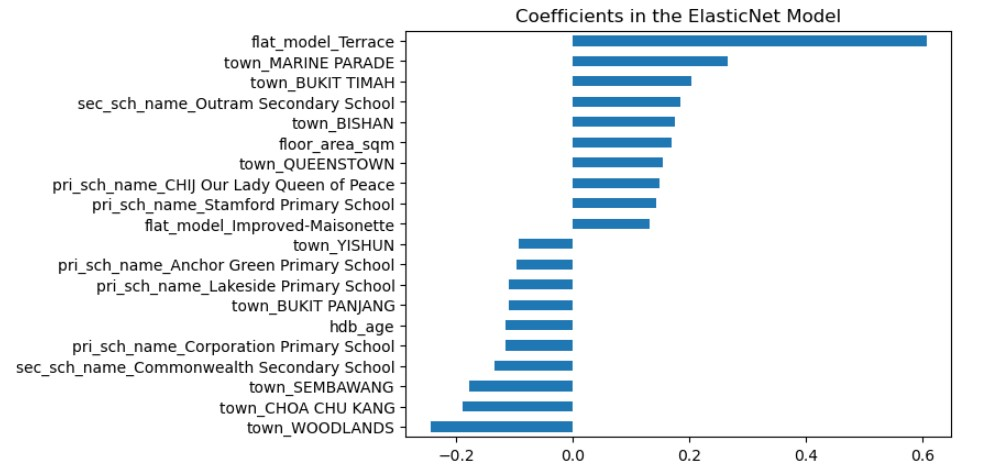

<span style='color:Blue'> There are limitation to datas such as for amenities there is only hawker and mall. We need to take into consideration other amenities that are available near the resale flat such as coffee shop, fast food outlets and other F&B resturants. Other amenities to consider will be supermarkets that are not located within the malls. 